Importing modules

In [1]:
import segmentation_models as sm
from tensorflow import keras
from datagenerator import DataGenerator

Segmentation Models: using `tf.keras` framework.


Creating model using standard parameters

In [2]:
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

model = sm.Unet(BACKBONE, encoder_weights=None, input_shape=(256,256,1))
model.compile(
    'Adam',
    loss=sm.losses.bce_jaccard_loss,
    metrics=[sm.metrics.iou_score],
)

Instructions for updating:
Colocations handled automatically by placer.


Loading ceramic training data

In [3]:
path_train = 'Ceramic_dataset/train'
path_train_a = 'Ceramic_dataset/trainannot'
gen = DataGenerator(path_train,path_train_a,image_size=(256,256), batch_size=4)

Loading ceramic evaluation data

In [4]:
path_val = 'Ceramic_dataset/val'
path_val_a = 'Ceramic_dataset/valannot'
val_gen = DataGenerator(path_val,path_val_a,image_size=(256,256), batch_size=4)

Loading ceramic test data

In [5]:
path_test = 'Ceramic_dataset/test'
path_test_a = 'Ceramic_dataset/testannot'
test_gen = DataGenerator(path_test,path_test_a,image_size=(256,256), batch_size=4)

Fitting data

In [6]:
history = model.fit_gen, epochs=1, validation_data=val_gen, verbose=1 epochs=1, verbose=1)

SyntaxError: invalid syntax (<ipython-input-6-be8a200bfb3c>, line 1)

Save the model

In [7]:
model.save('test_seg.h5')

Evaluate the model

In [8]:
score = model.evaluate(test_gen)

75/75 [==============================] - 53s 700ms/step - loss: 6.8230 - iou_score: 0.2958


Predict segmentations

In [9]:
y = model.predict(test_gen, verbose=1)

75/75 [==============================] - 51s 683ms/step


Plot result

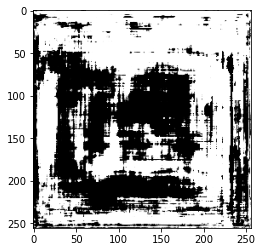

In [18]:
import matplotlib.pyplot as plt
y.shape 
plt.imshow(y[3,:,:,0], cmap='gray')